**In this notebook I will discussed step by step process of Data Science Life cycle Model(DSLC)**.
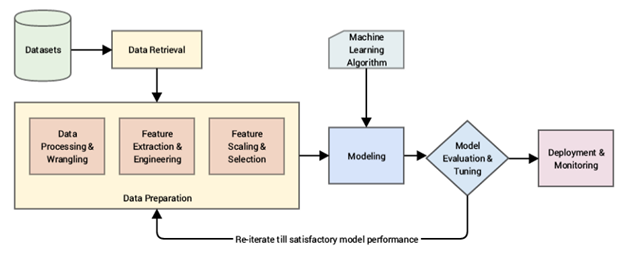

**Step 1 ) In this step I will Perform Exploratory Data Analysis (EDA).Exploratory Data Analysis is majorly performed using the following methods and Below are the steps involved to understand, clean and prepare your data for building your predictive model:**
*                     Univariate Analysis — provides summary statistics for each field in the raw data set
*                     Bivariate Analysis — is performed to find the relationship between each variable in the dataset and the target variable of interest
*                     Multivariate Analysis — is performed to understand interactions between different fields in the dataset
*                     Missing values treatment
*                     Outlier treatment
*                     Variable transformation
*                     Variable creation
*                     Dimensionality reduction — helps to understand the fields in the data that account for the most variance between observations and allow for the processing of a reduced volume of data.

The last 3 steps comes under **Feature Enginerring(Variable transformation,Variable creation,Dimensionality reduction)** it will only comes after  all upeer steps performed.

**Step 2) **Predictive Mdelling**

Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
# Importing the Dataset (This steps comes under data gathering for analysis)

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

**Variable Identification:**

First,We will  identify Predictor (Input) and Target (output) variables. Next, identify the data type and category of the variables.
As mentioed in Dataset description we can easily understand our Tagert and Predictor variables.Make sure before going in depth Analsis of datset you can understand the business problem very well.
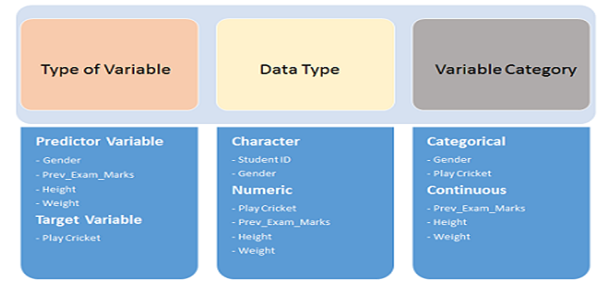

In [ ]:
train.head()

In [ ]:
train.info()

The Survived variable is the outcome or dependent variable. It is a binary nominal datatype of 1 for "survived" and 0 for "not survive". All other variables are potential predictor or independent variables. The goal is to predict this dependent variable only using the available independent variables. A test dataset has been created to test our algorithm.

In [ ]:
train.dtypes.value_counts()

**  Univariate Analysis **

At this stage, we explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous.

**Types Of Features**

**Categorical Features:**
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

**Categorical Features in the dataset: Sex,Embarked.**

**Ordinal Features:**

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

**Continous Feature:**

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

**Note: Univariate analysis is also used to highlight missing and outlier values.**


In [ ]:
train.describe()

In [ ]:
f,ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot('Pclass',data=train,ax=ax[0,0])
sns.countplot('Sex',data=train,ax=ax[0,1])
sns.countplot("SibSp",data=train,ax=ax[0,2])
sns.countplot("Survived",data=train,ax=ax[1,0])
sns.countplot("Parch",data=train,ax=ax[1,1])
sns.countplot("Embarked",data=train,ax=ax[1,2])
plt.show()

**Now what we have observed on above visulstion ?**

*  Pclass 3 have more number of pepole with compare to others as the Pclass are ordinal features we can see that Pclass3>Pclass1>Pclass2
* In  Sex, We have observed that number of Male too greater then Female(Male approx. 550+ and Female 300+).
*  In SibSp and Parch we have observed that most of the people don't have any family members.
* Most of the pepole Embarked from S(Southampton)approx. 630+ 
* At last we ca see about Survived, approx 550+ is died and 300+


**Now We will go in deep invetigation of all features, Means We will perform Bivariate Analysis and Multivariate Analysis .**

My Suggestion please read this material before Performing EDA -[https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/](http://)









In [ ]:
# First Lets start with feature Sex 
train.groupby(['Sex','Survived']).Survived.count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived or dead')
plt.show()

Here we can see that the number of men on the ship is  more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18-19%.

This looks to be a very important feature for modeling. But is it the best?? Lets check other features.

In [ ]:
# Now Lets discussed with feature Pclass
train.groupby(["Pclass"]).Survived.count()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("No of Pclass")
ax[0].set_ylabel('Count')
sns.countplot("Pclass",hue="Survived",data=train,ax=ax[1])
ax[1].set_title("Pclass Vs Survived or Dead")

Now again what you observed here ?

* we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue after that Pclass 3 and then Pclass 2.
* Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.
* For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. 

In [ ]:
# Analysis of SibSP features
f,ax = plt.subplots(1,2,figsize=(15,5))
train.SibSp.value_counts().plot.bar(ax=ax[0])
ax[0].set_title("No of SibSp")
ax[0].set_xlabel("SibSp")
ax[0].set_ylabel("Count of SibSp")
sns.countplot("SibSp",hue="Survived",data=train,ax=ax[1])

In [ ]:
sns.factorplot('SibSp','Survived',data=train,color="red")

In [ ]:
# Analysis of Parch features
f,ax = plt.subplots(1,3,figsize=(20,5))
train.Parch.value_counts().plot.bar(ax=ax[0])
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[2])
ax[0].set_title("No of Parch")
ax[0].set_xlabel("Parch")
ax[0].set_ylabel("Count of Parch")
sns.countplot("Parch",hue="Survived",data=train,ax=ax[1])

In [ ]:
sns.factorplot('Parch','Survived',data=train,color="red")

**Now here in Parch and SibSp both features provide approx the same result like if the number of family members increase the survival rate is decreasing.**

In [ ]:
# Analysis of Embarked features
f,ax = plt.subplots(2,2,figsize=(20,10))
train.Embarked.value_counts().plot.bar(ax=ax[0,0])
ax[0,0].set_title("Count")
ax[0,0].set_xlabel("Embarked")
ax[0,0].set_ylabel("Count")
sns.countplot("Embarked",hue="Survived",data=train,ax=ax[0,1])
train[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(ax=ax[1,0])
sns.countplot("Embarked",hue="Pclass",data=train,ax=ax[1,1])


1) Maximum passenegers boarded from S. Majority of them being from Pclass3.

2) Passengers borded from C have higher chance to survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.


In [ ]:
# Checking the missing values in Embarcked 
train.Embarked.isnull().sum()

In [ ]:
train.Embarked.fillna("S",inplace=True)
train.Embarked.isnull().sum()

In [ ]:
sns.factorplot('Embarked','Survived',data=train)

In [ ]:
# Analysis of AGE

print("Oldest Age:",train.Age.max(),"Years")
print("Youngest Age:",train.Age.min(),"Years")
print("Average Age:",train.Age.mean(),"Years")

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,5))
sns.violinplot(train.Age,ax=ax[0])
ax[0].set_title("Age Distribution")
sns.violinplot("Pclass","Age",hue="Survived",data=train,split=True,ax=ax[1])
ax[1].set_title("Pclass and Age Vs Survived")
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[2])
ax[2].set_title('Sex and Age vs Survived')

* Most of the croud have age between 15 - 55.
* The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.
* Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
* For males, the survival chances decreases with an increase in age.


As We know Age feature have many missing values (i.e. 177 null values), Now our task is to impute these values with appropriate age group.
Please read below challenge for handlng missing values
[https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values](http://)

Now our task is to find the reason for missing values like **Is this value missing becuase it wasn't recorded or becuase it dosen't exist?** In our case the Age missing values does't recorded because there no possibility of a person without Age.

if a value is missing becuase it wasn't recorded, then we can try to guess what it might have been based on the other values in that column and row. (This is called "imputation" )

In [ ]:
train['Salutations']=0
for i in train:
#lets extract the Salutations for strings which lie between A-Z or a-z and followed by a .(dot).
    train['Salutations']=train.Name.str.extract('([A-Za-z]+)\.') 

In [ ]:
train.Salutations.value_counts()

In [ ]:
pd.crosstab(train.Salutations,train.Sex).T

Here we can see that some of the values of inintial are misspelled like Mlle and Mme that may be possible stand for Miss.
Replacing these values with the same.

In [ ]:
train['Salutations'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(train.Salutations,train.Sex).T

In [ ]:
#lets check the averageof age by Initials
train.groupby('Salutations')['Age'].mean() 

In [ ]:
train.loc[(train.Age.isnull())&(train.Salutations=='Mr'),'Age'] = 32
train.loc[(train.Age.isnull())&(train.Salutations=="Miss"),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Salutations=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Salutations=="Master"),'Age'] = 4
train.loc[(train.Age.isnull())&(train.Salutations=="Other"),'Age'] = 46

In [ ]:
train.Age.isnull().any().sum()

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,5))
train[train['Survived']==0].Age.plot.hist(bins=20,color='red',ax=ax[0])
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(bins=20,color='green',ax=ax[1])
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**

1)The age<5 were saved in large numbers means Child first.

2)The oldest Passenger was saved(80 years)..

3)Maximum number of deaths were in the age group of 30-40.

4)Maximum number of Survival rate in between 20-25 group(These must be Female)

In [ ]:
# Fare features

train.Fare.describe()

In [ ]:
f,ax= plt.subplots(2,2,figsize=(20,5))
train.Fare.plot.hist(bins=20,color='green',ax=ax[0,0])
train[train['Pclass']==1].Fare.plot.hist(bins=20,color='green',ax=ax[0,1])
train[train['Pclass']==2].Fare.plot.hist(bins=20,color='green',ax=ax[1,0])
train[train['Pclass']==3].Fare.plot.hist(bins=20,color='green',ax=ax[1,1])

**Observations so far on Titanc dataset **

* The **PassengerID** and **Ticket** variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.

* The **Cabin** variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred. However, since there are many null values, it does not add value and thus is excluded from analysis.

* The **SibSp** represents number of related siblings/spouse aboard and **Parch** represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.

**Now we done with Univibrate,Mutlivibrate and Missing Values treatment.**

**Moving to next step i.e.  Outlier treatment**
What is Outlier ?

An outlier is an observation point that is distant from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.
reference [https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/](http://)

**After analysis of each features we have found that Age,SibSp,Parch and Fare have some outlier.**

**Methods of detecting Outlier** ---- Refer for more details [http://colingorrie.github.io/outlier-detection.html](http://)
1. Z-score method 
2.  Modified Z-score method
3.  IQR method -- Here we are using this method.

* Any data points outside 1.5 time the IQR (1.5 time IQR below Q1, or 1.5 time IQR above Q3), is considered an outlier.
* The interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between the 75th and 25th percentiles, or between upper and lower quartiles.

In [ ]:
# Outlier detection 
from collections import Counter
#Once initialized, counters are accessed just like dictionaries.
#Also, it does not raise the KeyValue error (if key is not present) instead the value’s count is shown as 0.
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","SibSp","Parch","Fare"])
train.loc[Outliers_to_drop] # Show the outliers rows

**Observations**

* The Detect_Outliers function found 10 outliers.
* PassengerID 28, 89 and 342 passenger have an high Ticket Fare
* The seven others have very high values of SibSP.
* I found that dropping the outliers actually lower the prediction. So I decided to keep them.
* You can try to remove them and rerun the prediction to observe the result with the following function:
    

In [ ]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

**Finding Correlation Between The Features: how to select the right variables for our Model?**

Correlation measure how two observed variables are related to each other . It has been used in many different ways in data science.

* Correlation is used in univariate analysis to identify which feature is more predictive for classification of regression task.
* To identify multicollinearity in the feature set . Multicollinearity reduse the accuracy of model.
* Identify casual relation ship between variables.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

**Now let’s discuss the  types of correlation:**

1. Positive correlation
2. Negative correlation
3. Zero correlation


**Positive correlation**: If due to increase of any of the two data, the other data also increases, we say that those two data are positively correlated.
For example, height and weight of a male or female are positively correlated.

**Negative correlation:** If due to increase of any of the two, the other decreases, we say that those two data are negatively correlated.
For example, the price and demand of a commodity are negatively correlated. When the price increases, the demand generally goes down.

**Zero correlation:** If in between the two data, there is no clear-cut trend. i.e. , the change in one does not guarantee the co-directional change in the other, the two data are said to be non-correlated or may be said to possess, zero correlation.







In [ ]:
sns.heatmap(train.corr(),annot=True)

**in the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.**

Wow We did great till here, Now we are going to discuess very important part i.e. **Feature Engineering.**
Here We will cover **Variable transformation,Variable creation,Dimensionality reduction**

Dimensionality reduction we will not cover here because all features are important and there are no Multicollinearity among the features as well.
Geranelly for Dimensionality reductions we are using** PCA(Principle Component Analysis)** you can refer the below links for in depth analysis of PCA.
Cousera Link [https://www.coursera.org/learn/machine-learning/lecture/ZYIPa/principal-component-analysis-algorithm](http://)


Now lets discuess what is Feature Engineering.

**“Coming up with features is difficult, time-consuming, requires expert knowledge. ‘Applied machine learning’ is basically feature engineering.”
— Prof. Andrew Ng.**

“Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.”

[https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/](http://)

[https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b](http://)

[http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/](http://)

**Age_band**

Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

Eg:If I say to group or arrange Sports Person by Sex, We can easily segregate them by Male and Female.

Now if I say to group them by their Age, then how would you do it? If there are 30 Persons, there may be 30 age values. Now this is problematic.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5=16. So bins of size 16.

In [ ]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.sample(5)

In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

In [ ]:
sns.factorplot('Age_band','Survived',data=train,col='Pclass')
plt.show()

The survival rate decreases as the age increases irrespective of the Pclass.

In [ ]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']#family size
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=train,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=train,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()


Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

In [ ]:
sns.factorplot('Alone','Survived',data=train,hue='Sex',col='Pclass')
plt.show()

**Fare_Range**
Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use pandas.qcut.

So what qcut does is it splits or arranges the values according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [ ]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [ ]:
train['Fare_cat'] = 0
train.loc[train.Fare<=7.91,'Fare_cat'] = 0
train.loc[(train.Fare>7.91) & (train.Fare<=14.454),'Fare_cat'] =1
train.loc[(train.Fare>14.454) & (train.Fare<=31.0),'Fare_cat'] =2
train.loc[(train.Fare>31.0) & (train.Fare<=512.329),'Fare_cat'] =3
sns.factorplot('Fare_cat','Survived',data=train,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

In [ ]:
train.sample(5)

**Converting String Values into Numeric**

Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [ ]:
train["Sex"]=train["Sex"].astype(str)
train["Embarked"]=train["Embarked"].astype(str)
train["Salutations"]=train["Salutations"].astype(str)
train.info()

In [ ]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Salutations'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Convert Formats**

We can convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we can use the sklearn and pandas functions.

[https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/](http://)

1. Categorical Encoding
2. Sklearn LabelEncoder
3. Sklearn OneHotEncoder
4. Pandas Categorical dtype
5. pandas.get_dummies

But in our case all categorical data already converted into numerical format.the above description is only for our knowedge.


In [ ]:
train["Sex"]=train["Sex"].astype(int)
train["Embarked"]=train["Embarked"].astype(int)
train["Salutations"]=train["Salutations"].astype(int)

In [ ]:
#Dropping unneeded features
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
sns.heatmap(train.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(10,8)

Now the above correlation plot, we can see some positively related features. Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

In [ ]:
sns.pairplot(train,hue="Survived",size=1.2)

**Moving to very important part of Machine learning phase:**    ** Predictive Modeling**

Following are the algorithms I will use to make the model:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression




In [ ]:
from sklearn.linear_model import LogisticRegression # For Logistic Regression 
from sklearn import svm # For SVM 
from sklearn.ensemble import RandomForestClassifier # For Random Forest
from sklearn.neighbors import KNeighborsClassifier # for KNN 
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # For Decesion Tree
from sklearn.cross_validation import train_test_split # for Splittng the data into Train and Test 
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
CopyOfTrainDataSet = train.copy() # Working on cpoy of data set and keeping original data set as safe
CopyOfTrainDataSet.head()

In [ ]:
X = CopyOfTrainDataSet.drop(["Survived"],axis=1)
Y = CopyOfTrainDataSet["Survived"]


In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 0,test_size = 0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

**Logistic Regression** is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Resources - [https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac](http://)

[https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/](http://)

In [ ]:
Logist = LogisticRegression(solver="liblinear")
Logist.fit(X_train,y_train)
Logistic_Predict = Logist.predict(X_test)
print('The accuracy of the Logistic Model is',metrics.accuracy_score(Logistic_Predict,y_test))

In [ ]:
for n in range(1,20,2):
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    Knn_Predict = knn.predict(X_test)
    print('The accuracy of the KNN Model is',n,metrics.accuracy_score(Knn_Predict,y_test))

In [ ]:
DecesionTree = DecisionTreeClassifier()
DecesionTree.fit(X_train,y_train)
DecesionTree_Predict = DecesionTree.predict(X_test)
print('The accuracy of the Decesion Tree Model is',metrics.accuracy_score(DecesionTree_Predict,y_test))


In [ ]:
RandomForest = RandomForestClassifier(n_estimators=100)
RandomForest.fit(X_train,y_train)
RandomForest_Predict = RandomForest.predict(X_test)
print('The accuracy of the Random Forest Model is',metrics.accuracy_score(RandomForest_Predict,y_test))


In [ ]:
NaiveBais = GaussianNB()
NaiveBais.fit(X_train,y_train)
NaiveBais_Predict = NaiveBais.predict(X_test)
print('The accuracy of the Naive Bais Model is',metrics.accuracy_score(NaiveBais_Predict,y_test))

In [ ]:
SVM = svm.SVC(kernel='linear',C=1,gamma=0.1)
SVM.fit(X_train,y_train)
SVM_Predict = SVM.predict(X_test)
print('The accuracy of the Linear SVM Model is',metrics.accuracy_score(NaiveBais_Predict,y_test))


In [ ]:
SVM = svm.SVC(kernel='rbf',C=1,gamma=0.1)
SVM.fit(X_train,y_train)
SVM_Predict = SVM.predict(X_test)
print('The accuracy of the Radial SVM Model is',metrics.accuracy_score(NaiveBais_Predict,y_test))

**Cross-Validation**

A common practice in data science  is to iterate over various models to find a better performing model. However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data. To find the right answer for this question, we use validation techniques. This method helps us in achieving more **generalized relationships**.

There is always a need to validate the stability of your machine learning model. I mean you just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before. You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error you see on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model



In [ ]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

Kfold = KFold(n_splits=10, random_state=22)

xyz=[]
accuracy=[]
std=[]
classifiers=['Radial SVM','Linear Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='rbf',C=1,gamma=0.1),svm.SVC(kernel='linear'),LogisticRegression(),KNeighborsClassifier(n_neighbors=7),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = Kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2



In [ ]:
plt.subplots(figsize=(12,6))
sns.boxplot(classifiers,accuracy)

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

**Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.

The confusion matrix shows the ways in which your classification model
is confused when it makes predictions.

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

[https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b](http://)

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf',C=1,gamma=0.1),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 480(for dead) + 243(for survived) with the mean CV accuracy being (480+243)/875 = 82.62% which we did get earlier using KFOLD
.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

3) Random Forest also predicting well after rbf-SVM. i.e approx (475+242)/875=81.94%

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

Here we can see that most accurate result we have got for rbf-SVM and Random Forest.

We will move towards **Hyperparameter Tuning** for those model and trying to improve our Classifiers socre.

Actually Machine learning models are parameterized so that their behavior can be tuned for a given problem.
Models can have many parameters and finding the best combination of parameters can be treated as a search problem.
Algorithm tuning is a final step in the process of applied machine learning before presenting results.The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as **Hyper-Parameter Tuning.**
![![image.png](attachment:image.png)](http://)

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.5,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)